# Hypergraphs

When studying random networks, multivariate PGFs can be useful to encode different types of connections; i.e., different stubs or degrees. For example, two variables $x$ and $y$ can be used to count in- and out-degree in directed networks. One can then use the framework covered so far almost as is, but has to be careful to operate over the correct variables. E.g., the excess degree of a node will be biased by its in-degree (probability of reaching it) but given by its out-degree. Here, we apply this idea to a popular family of network models: Hypergraphs, where connections can go beyond pairwise interactions between nodes.

## Graphs with clustering

Consider a random network with two types of interactions: Single edges and Triangles. When picking a node at random in this network, its connectivity can be measured by the number $s$ of single edges and the number $t$ of triangles around it. This connectivity is therefore drawn from the following multivariate PGF

$$
G_0(x,y) = \sum_{s,t}^\infty p_{s,t} x^s y^t
$$

If we were interested in its total degree, we would simply have to sum the contributions of single edges and triangles to the degree of the node. Since triangles involve two degrees per node, the degree distribution of the network is generated by

$$
g_0(z) = \sum_{s,t}^\infty p_{s,t} z^s z^{2t} = G_0(z,z^2)
$$

## Percolation on a hypergraph

Following the procedure outlined in our contagion on network section, we now want to calculate the excess connectivity of a node reached by following a random single edge:

$$
G_s(x,y) \propto \sum_{s,t}^\infty sp_{s,t} x^{s-1} y^t = \frac{1}{\langle s\rangle}\frac{\partial}{\partial x}G_0(x,y)
$$

and similarly when following a random triangle

$$
G_t(x,y) \propto \sum_{s,t}^\infty tp_{s,t} x^{s} y^{t-1} = \frac{1}{\langle t\rangle}\frac{\partial}{\partial y}G_0(x,y)
$$

where $\langle s\rangle$ and $\langle t\rangle$ are simply the average number of single edges and triangles per node and just act as a normalization factor so that $G_s(1,1) = G_t(1,1) = 1$.

We can then ask what is the probability $u$ that the node reached by following a single edge does not belong to a giant cluster, and the probability $v^2$ that neither nodes reached by following a triangle lead to a giant cluster. To make this calculation easier, we reverse the previous argument and ask for the following self-coherent relation

$$
u = (1-T)+TG_s(u,v^2) = 1-T[1-G_s(u,v^2)]
$$

since a single edge does not lead to the giant cluster if it doesn't exist (probability $1-T$) or if it does, then none of its excess connections must lead to the giant cluster (probability $TG_s(u,v^2)$). Things are a bit more complicated for $v^2$ since a triangle can be in more than two states after percolation. We state

$$
v^2 = (1-T)^2+ 2T(1-T)^2G_t(u,v^2) + 2T^2(1-T)G_t(u,v^2)^2 + T^2G_t(u,v^2)^2 = 1-2T(1-T)^2[1-G_t(u,v^2)]-T^2(3-2T)[1-G_t(u,v^2)^2]
$$

where in the middle expression, we account in order: For the probability that none of the two leaving the node on the triangle exist, the probability that only one exists and the third edge doesn't, the probability that only one exists but the third edge does, and the probability that both of the first edges encountered exist. We then simply need to account for the probabilities that the nodes reached (if any) do not lead to the giant cluster with their excess connections, which leads to the different powers of $G_t(u,v^2)$. These self-coherent expressions are more complicated than before, but can be solved in the exact same way.

Once that is done, we then calculate the size of the giant cluster as before

$$
S = 1-G_0(u,v^2) \; .
$$

/var/folders/qs/h2k9jxts0n34jj1zq8z7dvtw0000gn/T/ipykernel_93754/4122289488.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['ggplot', 'seaborn-talk'])


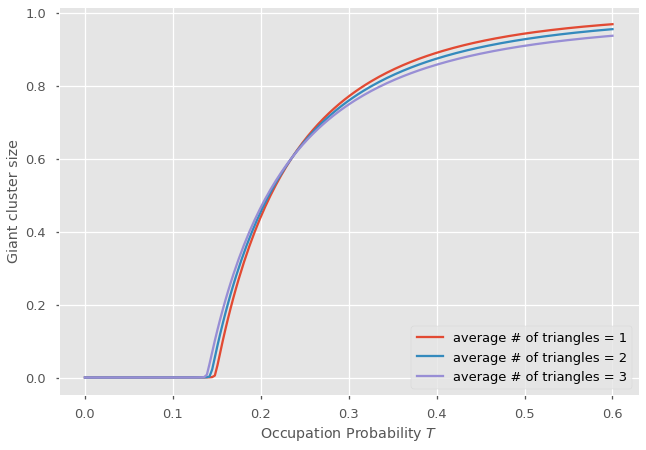

In [18]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use(['ggplot', 'seaborn-talk'])

# We set the distribution p_st to two independent Poisson distribution
#   with means mu for single edges and nu for triangles
def G0(x, y, mu, nu):
    value = 0
    for s in range(25):
        for t in range(25):
            value+=(np.exp(-mu-nu)/(math.factorial(s)*math.factorial(t)))*(mu*x)**s*(nu*y)**t
    return value

def Gs(x, y, mu, nu):
    value = 0
    for s in range(25):
        for t in range(25):
            value+=s*(np.exp(-mu-nu)/(math.factorial(s)*math.factorial(t)))*(mu*x)**(s-1)*(nu*y)**t
    return value

def Gt(x, y, mu, nu):
    value = 0
    for s in range(25):
        for t in range(25):
            value+=t*(np.exp(-mu-nu)/(math.factorial(s)*math.factorial(t)))*(mu*x)**(s)*(nu*y)**(t-1)
    return value

#Values of average connectivity to explore
mu_vec = [4.5, 2.5, 0.5] 
nu_vec = [1, 2, 3] 

for mu,nu in zip(mu_vec, nu_vec):
    Tlist = np.linspace(0.0,0.6,200)
    usol = []
    vsol = []
    Pext = []
    #Iterate over occupation probability
    for T in reversed(Tlist):
        u1 = usol[-1].copy() if usol else 0.5
        v1 = vsol[-1].copy() if usol else 0.5
        u2 = 1-T*(1-Gs(u1,v1,mu,nu))
        v2 = 1-2*T*(1-T)**2*(1-Gt(u1,v1,mu,nu))-T**2*(3-2*T)*(1-Gt(u1,v1,mu,nu)**2)
        #Iterate equations to find the self-consistent point
        while  abs(u2-u1) > 10**(-5) or abs(v2-v1) > 10**(-5):
            u1 = u2.copy()
            v1 = v2.copy()
            u2 = 1-T*(1-Gs(u1,v1,mu,nu))
            v2 = 1-2*T*(1-T)**2*(1-Gt(u1,v1,mu,nu))-T**2*(3-2*T)*(1-Gt(u1,v1,mu,nu)**2)
        usol.append(u2)
        vsol.append(v2)
        Pext.append(1-G0(u2,v2,mu,nu))
    Pext = list(reversed(Pext))
    plt.plot(Tlist,Pext,label=r'average # of triangles = %d' % nu)
plt.xlabel(r"Occupation Probability $T$")
plt.ylabel(r"Giant cluster size")
plt.legend(loc='lower right')
plt.show()

## Lesson from hypergraphs

The previous results are surprising. Let's think about it. We picked values of $\langle s\rangle$ and $\langle t\rangle$ such that the average degree is always preserved. With more triangles, we find that the size of the giant component (found at high occupation probability) is reduced by clustering. However, the percolation threshold where a giant cluster first appears is decreased by clustering! Could it be that clustering hurt the giant component of the network by making redundant connections but help percolation by giving second chances to reach certain nodes?

No! Clustering in and of itself should always hurt connectivity for a simple process like percolation. What is going on? Going beyond pairwise corrections does not just introduce local loops in our network, it also introduce degree correlations. Following an edge selects nodes proportionally to their degree, and thus nodes of degree at least one; but following a triangle selects nodes proportionally to their number of triangles, and thus of degree at least 2. This hypergraph is not so random anymore. There are short loops, and nodes of high degree are more likely to be connected than expected at random. 

Loops hinder the formation of percolation clusters, but degree correlations help!